# Oncoplot

In [3]:
!pip3 install matplotlib seaborn pandas

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


In [5]:
# Loading the sample data file
data = pd.read_csv("oncoplot_sample_data.csv")
print(data.head())


    Sample    Gene     Alteration
0  Sample1    TP53       Mutation
1  Sample2   BRCA1  Amplification
2  Sample3    EGFR       Deletion
3  Sample4  PIK3CA       Mutation
4  Sample5    KRAS       Mutation


In [8]:
# Assigning colors to alteration types
alteration_types = {
    "Missense": "#1f77b4", 
    "Deletion": "#d62728", 
    "Amplification": "#2ca02c",
    "Mutation": "#ee82ee"
}

# Unique alteration types in the dataset
print("Unique Alterations:", data["Alteration"].unique())

# Mapping colors to alterations, gray color for unknown alterations
data["Color"] = data["Alteration"].map(alteration_types).fillna("#808080")

Unique Alterations: ['Mutation' 'Amplification' 'Deletion']


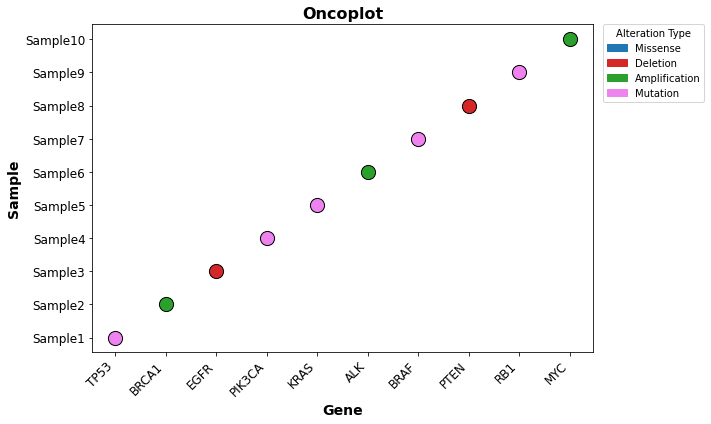

In [9]:
# Creating the Oncoplot
plt.figure(figsize=(10, 6))

for _, row in data.iterrows():
    plt.scatter(
        row["Gene"], row["Sample"],
        color = row["Color"], s=200, edgecolors="black"
    )

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Gene", fontsize=14, fontweight="bold")
plt.ylabel("Sample", fontsize=14, fontweight="bold")
plt.title("Oncoplot", fontsize=16, fontweight="bold")

legend_patches = [Patch(color=color, label=alt) for alt, color in alteration_types.items()]
plt.legend(handles=legend_patches, title="Alteration Type", 
           loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.show()